In [2]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

In [3]:
print("welcome to my homework!")

welcome to my homework!


In [4]:
def make_evolution(t, H):
    U = linalg.expm(-1*(1j)*H*t)
    #print("U ", U)
    return U 

In [5]:
# Q1 d) demonstrate the dynamics from a)
Omega = 1
hamiltonian = Omega*0.5*np.mat('[0,1.j;-1.j,0]')
time_list = np.linspace(0, 2*np.pi, 10)
print(time_list)
evolutions = [make_evolution(t, hamiltonian) for t in time_list]
print("evolutions: ", evolutions)

initial_state = np.mat('[1, 0]').transpose()

print("Apply gate for t_g = 7/2*PI/Omega: \n", np.matmul(make_evolution(7/2*np.pi, hamiltonian),initial_state))


[0.         0.6981317  1.3962634  2.0943951  2.7925268  3.4906585
 4.1887902  4.88692191 5.58505361 6.28318531]
evolutions:  [array([[1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j]]), array([[ 0.93969262+0.j,  0.34202014+0.j],
       [-0.34202014+0.j,  0.93969262+0.j]]), array([[ 0.76604444+0.j,  0.64278761+0.j],
       [-0.64278761+0.j,  0.76604444+0.j]]), array([[ 0.5      +0.j,  0.8660254+0.j],
       [-0.8660254+0.j,  0.5      +0.j]]), array([[ 0.17364818+0.j,  0.98480775+0.j],
       [-0.98480775+0.j,  0.17364818+0.j]]), array([[-0.17364818+0.j,  0.98480775+0.j],
       [-0.98480775-0.j, -0.17364818-0.j]]), array([[-0.5      +0.j,  0.8660254+0.j],
       [-0.8660254-0.j, -0.5      -0.j]]), array([[-0.76604444+0.j,  0.64278761+0.j],
       [-0.64278761-0.j, -0.76604444-0.j]]), array([[-0.93969262+0.j,  0.34202014+0.j],
       [-0.34202014-0.j, -0.93969262-0.j]]), array([[-1.00000000e+00+0.j,  2.35127499e-16+0.j],
       [-2.35127499e-16-0.j, -1.00000000e+00-0.j]])]
Apply gate for t_g = 7

C:\Users\wwatk\.conda\envs\qml\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


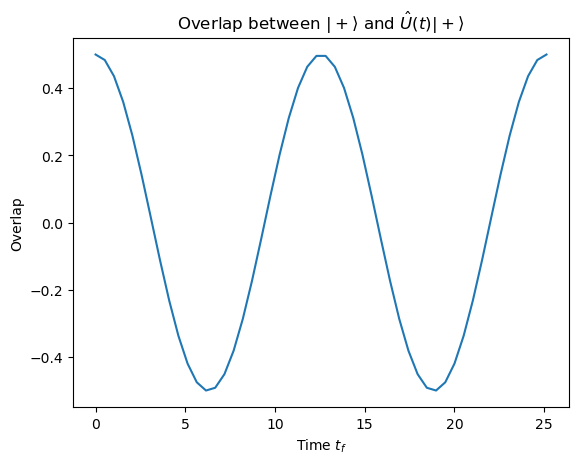

In [6]:
# Q1 d) demonstrate the dynamics from b)
omega = 1
hamiltonian = omega/2*np.mat('[1,0;0,-1]')
time_list = np.linspace(0, 8*np.pi, 50)
#print(time_list)
evolutions = [make_evolution(t, hamiltonian) for t in time_list]
#print("evolutions: ", evolutions)

initial_state = np.mat('[1, 1]').transpose()/np.sqrt(2)

evolved_state = [np.matmul(evolution, initial_state) for evolution in evolutions]

overlap = [np.vdot(initial_state, np.matmul(evolution, initial_state)) for evolution in evolutions]
overlap = np.array(overlap, dtype = 'complex_').reshape(50,)
plt.plot(time_list, overlap)
plt.title(r'Overlap between $\left|+\right\rangle$ and $\hat{U}(t)\left|+\right\rangle$')
plt.xlabel("Time $t_f$")
plt.ylabel("Overlap")
plt.savefig("p_overlap.pdf")

In [7]:
def calc_prob(state_1, state_2):
    #print("state_1: ", state_1)
    #print("state_2: ", state_2)
    amplitude = np.vdot(np.array(state_1), np.array(state_2))
    #print("amp: ", amplitude)
    return np.absolute(amplitude)**2

C:\Users\wwatk\.conda\envs\qml\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


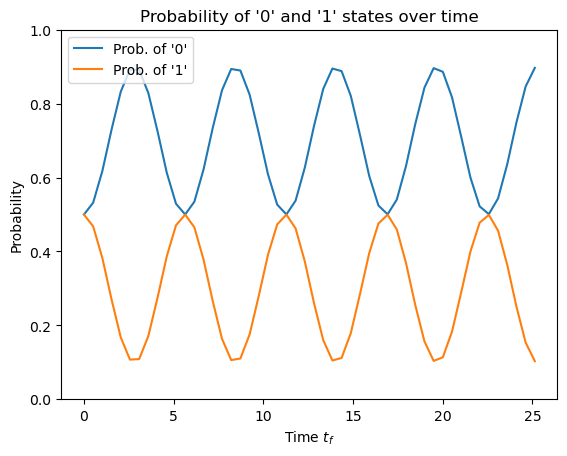

In [8]:
# Q1 d) demonstrates c)
omega = 1
Omega = 0.5
hamiltonian = omega/2*np.mat('[1,0;0,-1]') + Omega/2*np.mat('[0,1;1,0]')
time_list = np.linspace(0, 8*np.pi, 50)
#print(time_list)
evolutions = [make_evolution(t, hamiltonian) for t in time_list]
#print("evolutions: ", evolutions)

initial_state = np.mat('[1, 1]').transpose()/np.sqrt(2)

evolved_state = [np.matmul(evolution, initial_state) for evolution in evolutions]

#print("evolved state: ", evolved_state)

state_0 = np.mat('[1,0]').transpose()
state_1 = np.mat('[0,1]').transpose()

prob_one = [calc_prob(state_1, np.matmul(evolution, initial_state)) for evolution in evolutions]

prob_zero = [calc_prob(state_0, np.matmul(evolution, initial_state)) for evolution in evolutions]
                   
prob_zero = np.array(prob_zero, dtype = 'complex_').reshape(50,)
prob_one = np.array(prob_one, dtype = 'complex_').reshape(50,)


plt.plot(time_list, prob_zero, label="Prob. of '0'")
plt.plot(time_list, prob_one, label="Prob. of '1'")
plt.title("Probability of '0' and '1' states over time")
plt.xlabel("Time $t_f$")
plt.ylabel("Probability")
plt.ylim([0,1])
plt.legend()
plt.savefig("prob_0_1_python.pdf")

In [13]:
# Q2 d)
def calc_prob_op(state, operator):
    tmp = np.matmul(operator, state)
    #print('tmp: ', tmp)
    #print('inner product: ', np.vdot(np.array(state), np.array(tmp)))
    return np.absolute(np.vdot(np.array(state), np.array(tmp)))**2

sigma_z = np.mat('[1, 0;, 0, -1]')

delta_1 = 0.1
delta_2 = delta_1
J = 0.8
time_list = np.linspace(0, 10, 50)

hamiltonian = delta_1/2*np.kron(sigma_z,np.eye(2)) + delta_2/2*np.kron(np.eye(2), sigma_z) + J*np.kron(sigma_z, sigma_z)
print("Hamiltonian: \n", hamiltonian)

evolutions = [make_evolution(t, hamiltonian) for t in time_list]

# 00 state
state_00 = np.mat('[1,0,0,0]').transpose()
probs_00 = np.array([calc_prob_op(state_00, evolution) for evolution in evolutions]).reshape(50,)
print("Probs 00: ", probs_00)

# 0+ state
state_0p = np.mat('[1,0,1,0]').transpose()/np.sqrt(2)
probs_0p = np.array([calc_prob_op(state_0p, evolution) for evolution in evolutions]).reshape(50,)
print("Probs 0+: ", probs_0p)

# ++ state 
state_pp = np.mat('[1,1,1,1]').transpose()/2
probs_pp = np.array([calc_prob_op(state_pp, evolution) for evolution in evolutions]).reshape(50,)
print("Probs ++: ", probs_pp)

# Bell state
state_bell = np.mat('[1, 0, 0, 1]').transpose()/np.sqrt(2)
probs_bell = np.array([calc_prob_op(state_bell, evolution) for evolution in evolutions]).reshape(50,)
print("Probs Bell State: ", probs_bell)

Hamiltonian: 
 [[ 0.9  0.   0.   0. ]
 [ 0.  -0.8  0.   0. ]
 [ 0.   0.  -0.8  0. ]
 [ 0.   0.   0.   0.7]]
Probs 00:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
Probs 0+:  [1.00000000e+00 9.70208998e-01 8.84386009e-01 7.52758043e-01
 5.91010415e-01 4.18417622e-01 2.55546512e-01 1.21805459e-01
 3.31315828e-02 9.16172655e-05 2.66227373e-02 1.09563388e-01
 2.39030030e-01 3.99594899e-01 5.72124442e-01 7.36059348e-01
 8.71864476e-01 9.63356743e-01 9.99633565e-01 9.76372049e-01
 8.96344131e-01 7.69086259e-01 6.09762990e-01 4.37359924e-01
 2.72421300e-01 1.34601866e-01 4.03247369e-02 8.24353952e-04
 2.08077408e-02 9.78935970e-02 2.22896063e-01 3.80919344e-01
 5.53132754e-01 7.19014651e-01 8.58797886e-01 9.55825326e-01
 9.98534795e-01 9.81836861e-01 9.07721315e-01 7.85020065e-01
 6.28354681e-01 4.56394040e-01 2.89629659e-01 1.47933851e-01
 4.81916563e-02 2.28875332e-03 1.56951165e-02

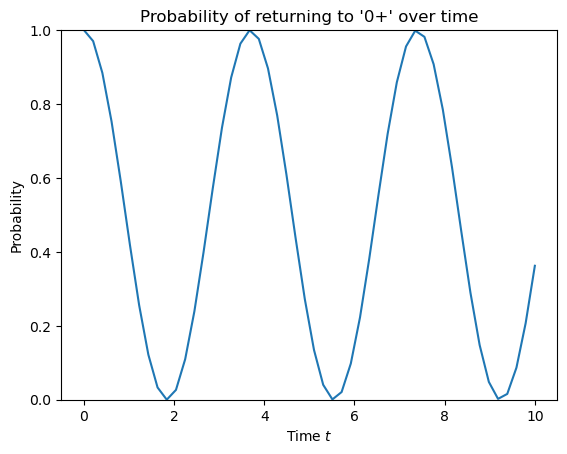

In [19]:
plt.plot(time_list, probs_0p)
plt.title("Probability of returning to '0+' over time")
plt.xlabel("Time $t$")
plt.ylabel("Probability")
plt.ylim([0,1])
plt.savefig("prob_0p_python.pdf")

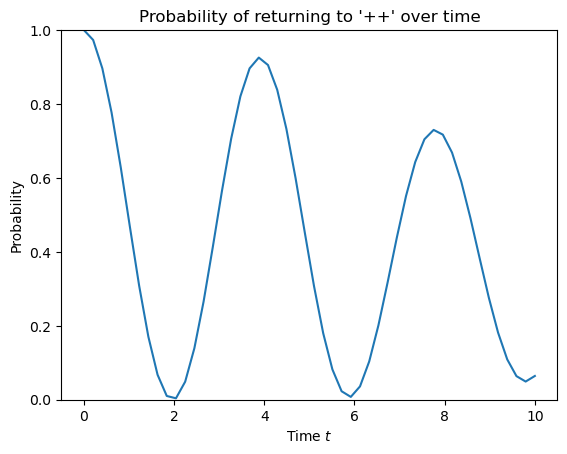

In [18]:
plt.plot(time_list, probs_pp)
plt.title("Probability of returning to '++' over time")
plt.xlabel("Time $t$")
plt.ylabel("Probability")
plt.ylim([0,1])
plt.savefig("prob_pp_python.pdf")

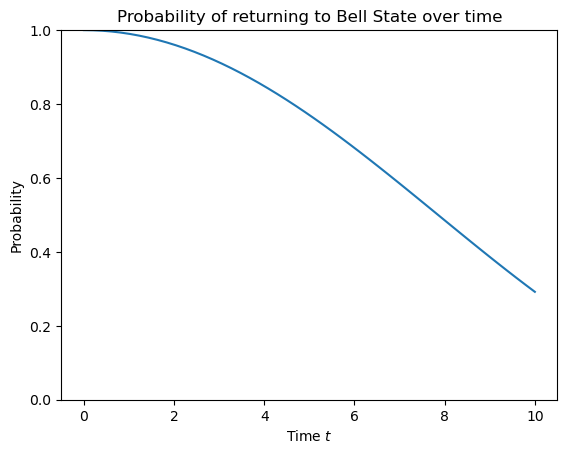

In [17]:
plt.plot(time_list, probs_bell)
plt.title("Probability of returning to Bell State over time")
plt.xlabel("Time $t$")
plt.ylabel("Probability")
plt.ylim([0,1])
plt.savefig("prob_bell_python.pdf")